<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Normal Distributions, Sampling Means, Confidence Intervals
              
</p>
</div>

Data Science Cohort Live NYC Aug 2022
<p>Phase 2: Topic 13</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### First a more thorough treatment of Central Limit Thorem
- motivated it earlier
- more precise statement will help us understand some important things about:
    - measurements and sample size effects.

- Measuring $X$ (e.g., calls per min at call center) in population:
    - follows some population distribution (Poisson)
    - population mean $\mu$
    - population variance $\sigma^2$

- $X$ is a random variable.

Can rescale/shift:

$$ Y = \frac{X - \mu}{\sigma} $$

- measures how far individual is from population mean in unit of standard deviation of population 

Rescaled/shift:

$$ Y =  \frac{X - \mu}{\sigma} $$

- Mean of $Y$ over population is 0.
- Standard deviation of $Y$ is 1.

Take a sample of size N : $X_1, X_2,...,X_N$

After shifting by population mean and rescaling by population standard deviation:

$$ Y_1,Y_2,...Y_N $$

#### A more precise statement of the central limit theorem:

If a random variable $Y_i$ has mean 0 and variance 1, then for a sample with sufficiently large $N$:

$$ S_N = \frac{Y_1 + Y_2 + ... Y_N}{\sqrt{N}} $$

is normally distributed with mean 0 and standard deviation 1.

E.g. $S_N$ follows the *standardized normal distribution*.

In [59]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

In [78]:
average_count_min = 2.5
# for Poisson turns out variance is equal to mean
var_count_min = average_count_min

sample_trial = poisson.rvs(mu = average_count_min, size = 250)

In [79]:
sample_trial

array([1, 2, 1, 4, 3, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 4, 2, 4, 1, 1,
       3, 1, 0, 5, 2, 9, 2, 3, 2, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 0, 0, 0,
       1, 2, 1, 7, 2, 3, 1, 1, 3, 2, 5, 5, 4, 1, 5, 1, 5, 0, 2, 4, 2, 3,
       3, 3, 2, 2, 0, 1, 5, 2, 2, 0, 3, 1, 0, 2, 2, 3, 2, 3, 1, 3, 5, 1,
       6, 2, 0, 3, 4, 4, 5, 3, 2, 5, 3, 1, 2, 2, 4, 4, 6, 3, 2, 4, 1, 1,
       0, 3, 1, 2, 0, 1, 3, 2, 3, 3, 1, 0, 3, 4, 2, 2, 2, 2, 2, 3, 3, 3,
       5, 3, 6, 5, 2, 2, 3, 3, 1, 2, 2, 2, 5, 0, 2, 3, 0, 3, 2, 2, 4, 0,
       5, 1, 3, 5, 1, 3, 4, 3, 1, 2, 2, 4, 2, 7, 6, 1, 4, 5, 1, 1, 3, 4,
       3, 2, 0, 1, 4, 1, 1, 3, 0, 3, 3, 6, 4, 2, 4, 3, 1, 2, 2, 3, 4, 4,
       0, 2, 2, 0, 1, 4, 7, 2, 0, 3, 0, 5, 4, 5, 2, 2, 6, 3, 2, 1, 1, 2,
       2, 3, 0, 1, 3, 5, 3, 1, 1, 3, 1, 1, 1, 2, 3, 3, 0, 3, 2, 3, 1, 3,
       4, 2, 0, 0, 1, 3, 1, 4])

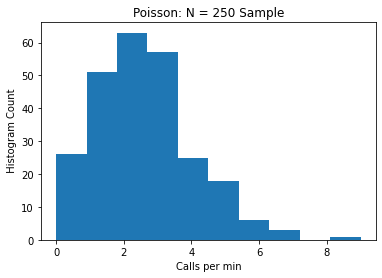

In [80]:
plt.hist(sample_trial)
plt.xlabel('Calls per min')
plt.ylabel(' Histogram Count')
plt.title('Poisson: N = 250 Sample')
plt.show()

In [81]:
sample_trial.mean()

2.416

In [82]:
sample_trial.var()

2.602944

Now conduct rescaling/shifting of sample:

$$ Y = \frac{X - \mu}{\sigma} $$

In [83]:
rescaled_sample = (sample_trial - average_count_min)/np.sqrt(var_count_min)

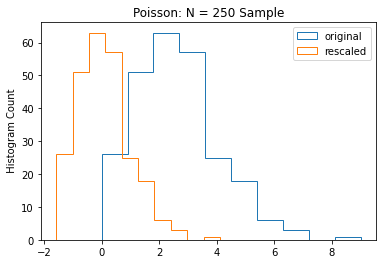

In [84]:
fig,ax = plt.subplots()
ax.hist(sample_trial, histtype = 'step', label = 'original' )
ax.hist(rescaled_sample, histtype = 'step', label = 'rescaled')
plt.ylabel(' Histogram Count')
plt.title('Poisson: N = 250 Sample')
plt.legend()
plt.show()

In [85]:
rescaled_sample.mean()

-0.053126264690828776

In [86]:
rescaled_sample.std()

1.020381105273907

Now, get sum of rescaled sample divided by square root of number of samples:

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

But let's do this for many trials of N-samples to build up statistics on $S_N$.

In [87]:
# standard deviation
std_count_min = np.sqrt(var_count_min)
# repeat sampling and for each sample subtract by population mean and divide by standard deviation.
many_rescaled_sample_trials = [(poisson.rvs(mu = average_count_min, size = 250) - average_count_min)/ std_count_min
                      for trial in range(10000)]


Compute the sum of each sample and divide by square root of the number in each sample.

- Gets a list of possible $S_N$


In [89]:
# compute the sum of each sample and divide by square root of the number in each sample
Sn_array = np.array([np.sum(sample)/np.sqrt(len(sample)) for sample in many_rescaled_sample_trials])
Sn_array

array([-1.52, -2.28, -0.84, ..., -1.24,  1.88, -0.04])

Central limit theorem tells me $S_n$ normally distributed:
- Mean 0 
- Standard deviation 1

Is this true for our data?

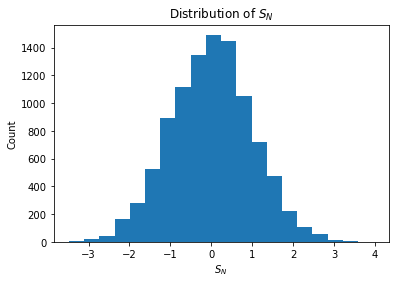

In [90]:
plt.hist(Sn_array, bins = 20)
plt.xlabel('$S_N$')
plt.ylabel('Count')
plt.title('Distribution of $S_N$')
plt.show()

In [91]:
Sn_array.mean()

-0.0013600000000000428

In [92]:
Sn_array.std()

0.9954643089533647

We have just seen that:

Provided N large enough

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

is distributed normal with mean 0, std 1.

But a very important situation that's often encountered:

- I have $N$ samples of a measurement: the counts per min.

- Calculate sample mean (average of $X_i$ in sample)

$$ \bar{X} = \frac{X_1 + X_2 + ... + X_N}{N}$$


Remember that is $\bar{X}$ is a random variable:

- repeating another N-sample measurement, might yield a different sample mean $\bar{X}$.

How is $\bar{X}$ distributed?
- Answering this question will be important in:
     - estimating an unknown population mean based off of a sample mean $\bar{X}$
     - quantifying uncertainty in that population mean.
     - hypothesis testing on sample means.

They key is in relating $\bar{X}$ to $S_N$ from the central limit theorem.

$$ \bar{X} = \frac{X_1 + X_2 + ... + X_N}{N}$$

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$
<br><br>
$$ S_N = \frac{(X_1 - \mu) + (X_2 - \mu) + ... (X_N - \mu)}{\sigma\sqrt{N}} $$


$$ S_N = \frac{(X_1  + X_2  + ... + X_N) - N \mu }{\sigma\sqrt{N}} $$

but since:

$$ \bar{X} = \frac{X_1 + X_2 + ... + X_N}{N}$$


$$ S_N = \frac{N \bar{X} - N \mu }{\sigma\sqrt{N}} $$
$$ S_N = \frac{ \bar{X} - \mu }{\frac{\sigma}{\sqrt{N}}} $$

By CLT:

$$ S_N = \frac{ \bar{X} - \mu }{\frac{\sigma}{\sqrt{N}}} $$ is normally distributed with mean 0 and std 1.

Doing the reverse scale transformation implies:
    
- $ \bar{X} $ is normally distributed:
    <center>mean of sample $\bar{X}$ is population mean </center> $$ \mu $$
    <center> standard deviation is of $\bar{X}$ is: </center>
    $$ \frac{\sigma}{\sqrt{N}} $$

- $ \bar{X} $ is normally distributed:
    <center>mean of sample $\bar{X}$ is population mean </center> $$ \mu $$
    <center> standard deviation is of $\bar{X}$ is: </center>
    $$ \frac{\sigma}{\sqrt{N}} $$
    
Remember: $\sigma$ was **population** standard deviation.

**Question** as N goes large

- Repeat many samples of size $N$. Get $\bar{X}$ for each.
- What happens to my spread on $\bar{X}$ as $N$ goes large?


<center> mean of sample $\bar{X}$ is population mean </center> $$ \mu $$
    <center> standard deviation is of $\bar{X}$ is: </center>
    $$ \frac{\sigma}{\sqrt{N}} $$
    

Let's see this in action:

- Counting calls / min at toll center.
- Take samples of different sizes.

Get distribution of $\bar{X}$ for different sampling sizes:

In [93]:
N_list = [50, 250, 1000]

Repeat trials for each sample size 10,000 times to build statistics on $\bar{X}$.

In [94]:
# construct 10000 trials of N samples.
def poisson_trials_Nsamples(avg_count, N_list, num_trials):
    
    for N in N_list:
        
        Nsample_trial_list =  [poisson.rvs(mu = average_count_min, size = N).mean() for trials in range(num_trials)]
        
        
        plt.hist(Nsample_trial_list, density = True, histtype = 'step',  label = "N = " + str(N))
    
    plt.axvline(avg_count, c = 'b', linewidth =2, linestyle = '--')
    plt.legend()
    plt.show()
        


- True average call rate: 2.5 calls per minute on average.
- Taking samples of various size: 

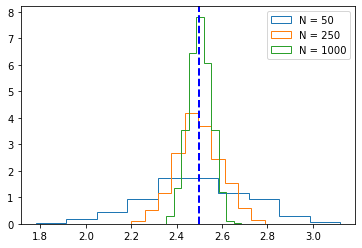

In [95]:
poisson_trials_Nsamples(2.5, N_list, 1000)

Distribution of sample means gets sharper and sharper around the true population mean!!!

- For sample size $N$: 
    - can now quantify our uncertainty of $\bar{X}$
    - given population mean $\mu$

Lends some credence to the idea that:
- measuring a sample of $X_i$ with a size N as large as possible
- taking its average $\bar{X}$ will help yield an estimate of $\mu$ and its spread.

**Usually in statistics and measurement/metrology:**

- No idea what the population mean $\mu$ is.
- Using sampling to *infer* the unknown population mean $\mu$.
- Want to also know uncertainities in this estimate.

Given a single sample of $N$ measurements:
- Get a value of $\bar{X} = \bar{X}_0 $.
- Given $\bar{X} = \bar{X}_0 $:
    - $\bar{X}_0$ is our estimate of $\mu$.
    - Estimating uncertainty in $\bar{X}$:
    - Equivalent to getting uncertainty range of unknown population mean $\mu$.


<div align = "center">
<img src="Images/sampleinterval.png" align = "center" width="800"/>
</div>

The uncertainty range is often cited in terms of a **confidence interval**.

#### The confidence interval is defined with respect to a probability
- Confidence interval at 0.95 implies:
    - Given sample mean $\bar{X_0}$.
    -  What is region of $\bar{X}$ assuming $\bar{X_0}$ is population mean accounting for 95\% of probability?
    - Same as range accounting for 95% of unknown population means.

<div align = "center">
<img src="Images/confidenceinterval1.png" align = "center" width="800"/>
</div>

Let's do this for a specific example.

In [32]:
N = 100
one_sample = poisson.rvs(mu = 2.5, size = N)

##### N = 100 sample of call center counts/min.

In [96]:
one_sample

array([2, 2, 3, 5, 4, 2, 2, 4, 2, 1, 2, 3, 5, 2, 3, 2, 1, 2, 0, 2, 3, 0,
       2, 1, 3, 4, 4, 3, 0, 4, 4, 2, 3, 0, 3, 0, 2, 4, 4, 2, 4, 2, 3, 3,
       2, 3, 1, 3, 3, 5, 0, 2, 4, 6, 5, 2, 4, 2, 3, 3, 3, 1, 1, 3, 2, 3,
       2, 6, 4, 2, 0, 6, 0, 2, 3, 3, 3, 1, 3, 3, 3, 2, 6, 5, 4, 3, 3, 4,
       2, 1, 1, 2, 4, 6, 0, 1, 2, 5, 1, 1])

In [97]:
Xbar_0 = one_sample.mean()
Xbar_0

2.64

Provide $N$ is large enough: 
CLT give us ability to make some statements about range!
- sample standard deviation $s \approx \sigma$ (only true for large enough N > 30)
- $\bar{X}$ would then be distributed normally with mean $\bar{X}_0$ and std $\frac{s}{\sqrt{N}}$

To get 95% confidence interval for normal:

$$ \bar{X_0} \pm 1.96\frac{\sigma}{\sqrt{N}} $$

Where we just looked up $z* \approx 1.96$ from a table.

Let's see.

In [99]:
sigma_N = one_sample.std()/(np.sqrt(N))
half_range = 1.96*sigma_N
half_range

0.29532979260480985

In [101]:
(Xbar_0 - half_range, Xbar_0 + half_range)

(2.34467020739519, 2.93532979260481)

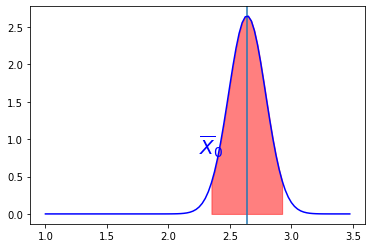

In [102]:
from scipy.stats import norm 
x_vals = np.arange(1.0, 3.5, .025)

y_vals_gauss = norm.pdf(x_vals, loc = Xbar_0, scale = sigma_N)
plt.fill_between(x_vals, y_vals_gauss, where = (Xbar_0 - half_range < x_vals) & (Xbar_0 + half_range > x_vals), alpha = 0.5, color='r')
plt.axvline(Xbar_0)
plt.annotate("$\overline{X}_0$", c ='b', xy = (2.25, 0.8), fontsize = 20)
plt.plot(x_vals, y_vals_gauss, c = 'b')

plt.show()


Probability that repeated samples will have $\bar{X}$ falling with this range: 
- Can calculate this using the CDF

In [41]:
p2 = norm.cdf(Xbar_0 + half_range, loc = Xbar_0, scale = sigma_N)
p1 = norm.cdf(Xbar_0- half_range , loc = Xbar_0, scale = sigma_N)

p_in_95CI = p2 - p1

p_in_95CI

0.9500042097035593

Thus my measured estimate of the population mean is  mean $\bar{X}_0 $:

In [42]:
Xbar_0

2.64

With a range of uncertainty in $\bar{X}$ (and thus population mean)

In [43]:
(Xbar_0 - half_range, Xbar_0 + half_range)

(2.34467020739519, 2.93532979260481)

at the 95\% confidence interval.

95% confidence that true population mean lies in this interval.

Can also report results of confidence intervals at different levels of confidence:


Higher levels of confidence mean larger ranges of $\bar{X}$.


- e.g. 99\% confidence interval:
$$ \bar{X_0} \pm 2.576\frac{\sigma}{\sqrt{N}} $$
- 99.5\% confidence interval:
$$ \bar{X_0} \pm 2.807\frac{\sigma}{\sqrt{N}} $$
- 99.9% confidence interval:
$$ \bar{X_0} \pm 3.291\frac{\sigma}{\sqrt{N}} $$


What happens to my confidence intervals as N increases?

From a finite sample:

- We estimated average counts/min at call center
- Also estimated range of values average counts/min could lie in attached to a certain confidence level.

We looked up $z*$ for a given confidence level in a table:

- But can also calculate this directly using some math and Scipy.

The first step in the math intuition:

<div align = "center">
<img src="Images/confidenceinterval2.png" align = "center" width="500"/>
</div>

The second step in the math:

<div align = "center">
<img src="Images/confidencezstar.png" align = "center" width="500"/>
</div>

The ppf for the normal distribution can be calculated using scipy.
- norm.ppf(probability) outputs value $z^*$ for which P(z<z*) = probability
- given $z$ is governed by the standardize normal distribution (mean 0, std 1)

In [103]:
from scipy.stats import norm

In [104]:
c = 0.95 # confidence level

# this is the probability 
# we input in ppf
half_alpha = (1 - c)/2 

In [105]:
norm.ppf(half_alpha)

-1.959963984540054

In [106]:
zstar_95 = np.abs(norm.ppf(half_alpha))
zstar_95

1.959963984540054

Confidence interval range is :

In [107]:
ci = (Xbar_0 - zstar_95*(sigma_N), 
      Xbar_0 + zstar_95*(sigma_N))

print(ci)

(2.3446756341494335, 2.9353243658505668)


In [49]:
# From lookup table:
(Xbar_0 - half_range, Xbar_0 + half_range)

(2.34467020739519, 2.93532979260481)

Can also get the confidence interval directly via the .interval() method:
- Fast, clean way to do it.

- first argument is confidence level
- loc argument will be the sample mean
- the scale will be $$ \sigma_N = \frac{\sigma}{\sqrt{N}} \approx \frac{s}{\sqrt{N}}$$.

In [50]:
from scipy.stats import norm

c = 0.95 # confidence level
#(95% chance population mean lies in interval)
norm.interval(c, loc = Xbar_0, scale = sigma_N)

(2.3446756341494335, 2.9353243658505668)

Our calculation from before with N = 100 samples

In [51]:
(Xbar_0 - half_range, Xbar_0 + half_range)

(2.34467020739519, 2.93532979260481)

#### Calculate confidence interval at the 0.995 confidence level.

In [52]:
N_2 = 200
another_sample = poisson.rvs(mu = 3.5, size = N_2)

You have a sample of call counts / min from a different call center:

- The sample size N = 200
- We also can calculate the sample mean and standard deviation.

In [53]:
another_sample

array([6, 4, 2, 1, 1, 5, 3, 0, 2, 7, 5, 2, 5, 2, 4, 2, 2, 3, 1, 3, 5, 2,
       7, 5, 4, 5, 2, 4, 2, 2, 2, 2, 7, 5, 1, 2, 7, 3, 7, 4, 4, 3, 5, 4,
       9, 3, 4, 3, 4, 2, 1, 5, 5, 2, 4, 3, 5, 4, 3, 2, 2, 2, 4, 3, 0, 5,
       2, 1, 4, 3, 7, 9, 5, 4, 1, 5, 5, 7, 5, 6, 6, 3, 6, 0, 3, 5, 5, 2,
       5, 6, 2, 5, 3, 6, 2, 5, 3, 6, 4, 3, 2, 5, 4, 4, 2, 5, 6, 7, 5, 3,
       1, 6, 5, 8, 1, 2, 3, 1, 3, 4, 8, 5, 4, 3, 1, 4, 1, 2, 3, 2, 1, 4,
       2, 4, 6, 3, 3, 5, 2, 2, 2, 3, 4, 2, 1, 4, 6, 2, 4, 6, 4, 3, 6, 4,
       4, 5, 7, 4, 6, 9, 4, 1, 3, 1, 6, 1, 4, 3, 2, 6, 1, 2, 5, 4, 5, 5,
       4, 3, 5, 3, 6, 3, 2, 6, 1, 8, 0, 1, 2, 2, 6, 3, 0, 1, 2, 2, 3, 3,
       1, 4])

In [54]:
# get the sample mean and sample standard 
# deviation
Xbar = another_sample.mean()
sigma = another_sample.std()

In [55]:
# get the number of trials
N2 = len(another_sample)
N2

200

#### Use the .interval method and the defined Xbar, sigma, N2 to calculate  the confidence interval at 99.5%

In [56]:
c = .995
norm.interval(c, loc = Xbar, scale = sigma/np.sqrt(N2))

(3.2393838957094814, 4.01061610429052)

#### Calculate z* for the 99.5 percent confidence interval

In [57]:
z_star = np.abs(norm.ppf((1-c)/2))
z_star

2.807033768343804

In [58]:
# Output the confidence interval as a tuple using z* and other statistics:

(Xbar -  z_star*(sigma/np.sqrt(N2)), Xbar + z_star*(sigma/np.sqrt(N2)))

(3.2393838957094814, 4.010616104290518)

**Statistics, probability**

- Enabled us to start quantifying uncertainty in data in a principled way.
- This is the *essence* of the scientific method!

If I measure a thing, how certain am I that it is the value I say?

Could it be other values?

Range of values it could be quantifying my confidence.